In [1]:
# Import Dependencies
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib as mp 
import matplotlib.pyplot as plt

In [2]:
training_df=pd.read_csv(r'loan_data\training_loan_data.csv')

In [3]:
training_df= training_df.iloc[0:, 0:]


In [4]:
training_df = training_df.dropna(axis='columns', how='all')
training_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
training_df = training_df.dropna(axis='index', how='any')
training_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
training_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [7]:
training_df.groupby(by = ['Gender', 'Married', 'Education', 'Self_Employed'])['Education'].count()

Gender  Married  Education     Self_Employed
Female  No       Graduate      No                46
                               Yes                5
                 Not Graduate  No                 7
                               Yes                3
        Yes      Graduate      No                19
                               Yes                3
                 Not Graduate  No                 2
                               Yes                1
Male    No       Graduate      No                73
                               Yes               11
                 Not Graduate  No                21
                               Yes                3
        Yes      Graduate      No               192
                               Yes               34
                 Not Graduate  No                54
                               Yes                6
Name: Education, dtype: int64

In [8]:
training_df.groupby(by = ['ApplicantIncome', 'CoapplicantIncome', 'Education','Loan_Status', 'Self_Employed'])['Loan_Status'].count()

ApplicantIncome  CoapplicantIncome  Education  Loan_Status  Self_Employed
150              1800.0             Graduate   N            No               1
645              3683.0             Graduate   Y            No               1
1000             3022.0             Graduate   N            Yes              1
1025             2773.0             Graduate   Y            No               1
1299             1086.0             Graduate   Y            No               1
                                                                            ..
33846            0.0                Graduate   N            No               1
37719            0.0                Graduate   Y            No               1
39147            4750.0             Graduate   Y            Yes              1
39999            0.0                Graduate   Y            No               1
81000            0.0                Graduate   N            No               1
Name: Loan_Status, Length: 470, dtype: int64

In [9]:
training_df.groupby(by = ['Gender'])['Loan_Status'].count()

Gender
Female     86
Male      394
Name: Loan_Status, dtype: int64

In [10]:
training_df.groupby(by = ['Gender','Loan_Status'])['Loan_Status'].count()

Gender  Loan_Status
Female  N               32
        Y               54
Male    N              116
        Y              278
Name: Loan_Status, dtype: int64

In [11]:
training_df.groupby(by = ['Gender','Married'])['Loan_Status'].count()

Gender  Married
Female  No          61
        Yes         25
Male    No         108
        Yes        286
Name: Loan_Status, dtype: int64

In [12]:
training_df.groupby(by = ['Gender','Loan_Amount_Term'])['Loan_Amount_Term'].count()

Gender  Loan_Amount_Term
Female  36.0                  1
        84.0                  1
        180.0                 1
        300.0                 1
        360.0                79
        480.0                 3
Male    36.0                  1
        60.0                  2
        84.0                  2
        120.0                 3
        180.0                35
        240.0                 2
        300.0                 8
        360.0               332
        480.0                 9
Name: Loan_Amount_Term, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024045C6DC48>],
      dtype=object)

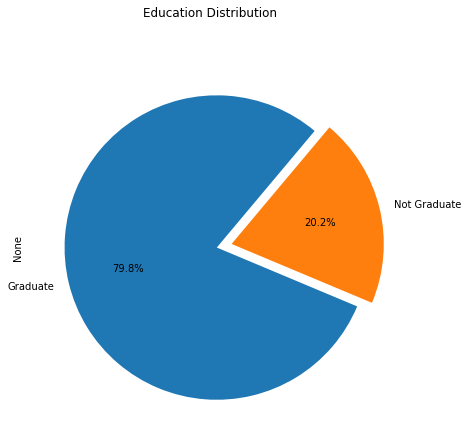

In [13]:
# Generate a pie plot for education distribution
training_df_gender = training_df.groupby(["Education"]).size()
explode =(0,0.1)
training_df_gender.plot(kind="pie", subplots=True, figsize=(7,7), title="Education Distribution", explode=explode, 
                        startangle=50,autopct="%1.1f%%")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000240463BFE48>],
      dtype=object)

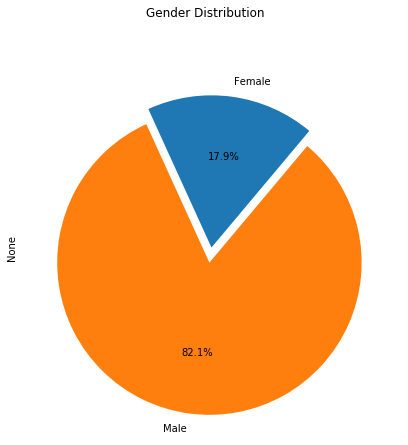

In [14]:
# Generate a pie plot showing gender distribution
training_df_gender = training_df.groupby(["Gender"]).size()
explode =(0,0.1)
training_df_gender.plot(kind="pie", subplots=True, figsize=(7,7), title="Gender Distribution", explode=explode, 
                        startangle=50, autopct="%1.1f%%")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024046413388>],
      dtype=object)

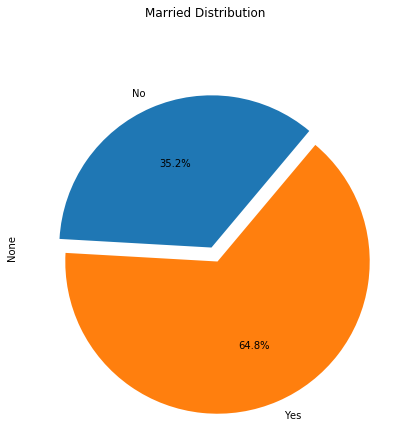

In [15]:
# Generate a pie for the distribution of martial status
training_df_gender = training_df.groupby(["Married"]).size()
explode =(0,0.1)
training_df_gender.plot(kind="pie", subplots=True, figsize=(7,7), title="Married Distribution", explode=explode, 
                        startangle=50, autopct="%1.1f%%")

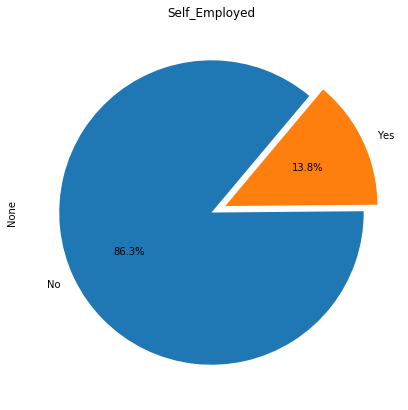

In [16]:
# Generate a pie plot for the distribution self employed
training_df_gender = training_df.groupby(["Self_Employed"]).size()
explode =(0,0.1)
training_df_gender.plot(kind="pie", figsize=(7,7), title="Self_Employed", explode=explode, startangle=50, autopct="%1.1f%%")